<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 550px;
  text-align: left;
">
  <h2 style="margin: 0;">Online Food Analysis</h2>
</div>

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 450px;
  text-align: left;
">
  <h2 style="margin: 0;">Overview of Data</h2>
</div>

In [185]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df = pd.read_csv('onlinefoods.csv')
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [187]:
df.drop(columns='Unnamed: 12', inplace=True)

In [188]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

In [189]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [190]:
df.shape

(388, 12)

In [191]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [192]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 550px;
  text-align: left;
">
  <h2 style="margin: 0;">Demographic Analysis</h2>
</div>

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 950px;
  text-align: left;
">
  <h4 style="margin: 0;">What is the age distribution of the population in the dataset?</h4>
</div>

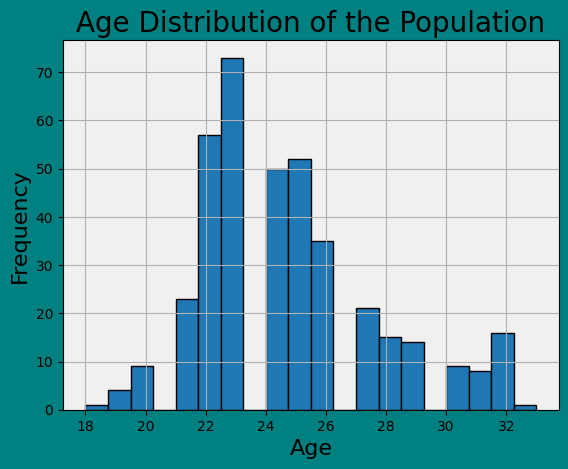

In [193]:
df['Age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution of the Population', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.gca().set_facecolor('#f0f0f0')
plt.gca().grid('turquoise')
plt.gcf().patch.set_facecolor('teal')
plt.show()

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 650px;
  text-align: left;
">
  <h4 style="margin: 0;">What is the gender ratio in the dataset?</h4>
</div>

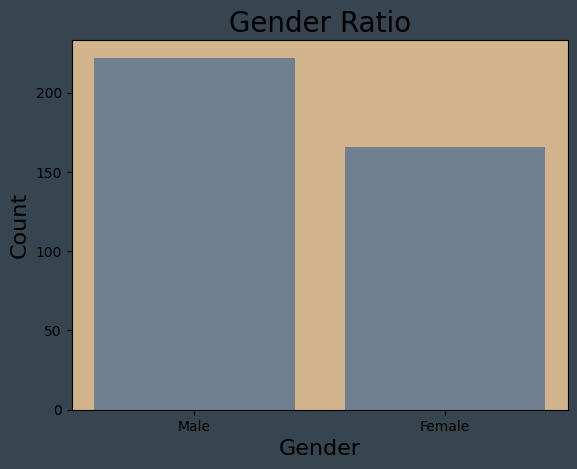

In [194]:
gender_counts = df['Gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values, color='#708090')
plt.title('Gender Ratio', fontsize=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.gca().set_facecolor('#D2B48C')
plt.gcf().patch.set_facecolor('#36454F')
plt.show()

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 950px;
  text-align: left;
">
  <h4 style="margin: 0;">What is the marital status distribution (single, married, divorced, etc.)?</h4>
</div>

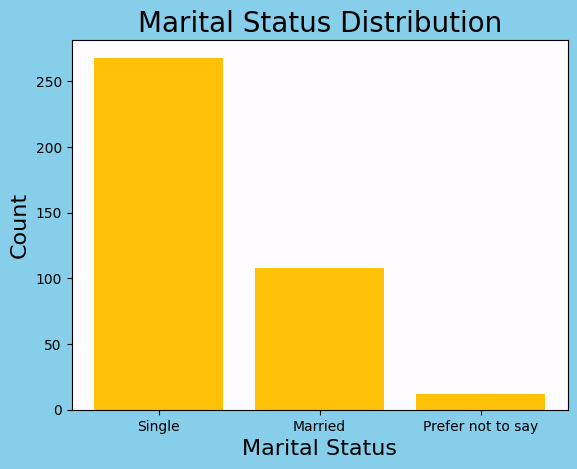

In [195]:
marital_status_counts = df['Marital Status'].value_counts()

plt.bar(marital_status_counts.index, marital_status_counts.values, color='#FFC107')
plt.title('Marital Status Distribution', fontsize=20)
plt.xlabel('Marital Status', fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.gca().set_facecolor('#FFFCFF')
plt.gcf().patch.set_facecolor('#87CEEB')
plt.show()

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 800px;
  text-align: left;
">
  <h2 style="margin: 0;">Education and Income Analysis</h2>
</div>

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 1000px;
  text-align: left;
">
  <h4 style="margin: 0;">What is the educational qualification distribution (Post Graduate, Graduate, Undergraduate, etc.)?</h4>
</div>

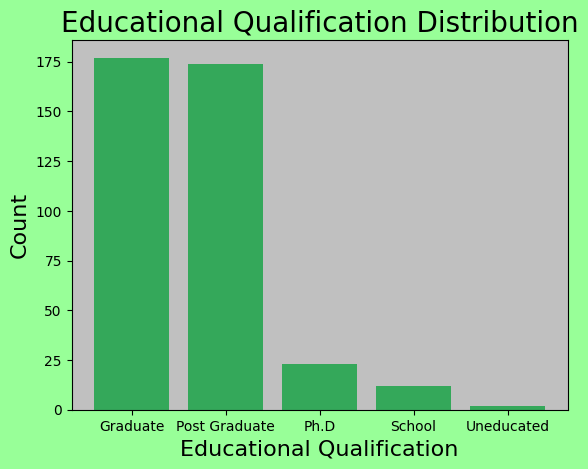

In [196]:
education_counts = df['Educational Qualifications'].value_counts()

plt.bar(education_counts.index, education_counts.values, color='#34A85A')
plt.title('Educational Qualification Distribution', fontsize=20)
plt.xlabel('Educational Qualification', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.gca().set_facecolor('#C0C0C0')
plt.gcf().patch.set_facecolor('#98FF98')
plt.show()

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 1000px;
  text-align: left;
">
  <h4 style="margin: 0;">What is the average monthly income of the population in the dataset?</h4>
</div>

In [197]:
pd.DataFrame(df.groupby('Monthly Income'))[0]

df.loc[df['Monthly Income'] == '10001 to 25000', 'Monthly Income'] = 17500
df.loc[df['Monthly Income'] == '25001 to 50000', 'Monthly Income'] = 37500
df.loc[df['Monthly Income'] == 'Below Rs.10000', 'Monthly Income'] = 10000
df.loc[df['Monthly Income'] == 'More than 50000', 'Monthly Income'] = 50000
df.loc[df['Monthly Income'] == 'No Income', 'Monthly Income'] = 0

df['Monthly Income'] = df['Monthly Income'].astype(int)

In [198]:
average_income = round(df['Monthly Income'].mean(),2)

print('Average Monthly Income is: ', average_income)

Average Monthly Income is:  17332.47


<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 1000px;
  text-align: left;
">
  <h4 style="margin: 0;">Is there a correlation between education level and income?</h4>
</div>

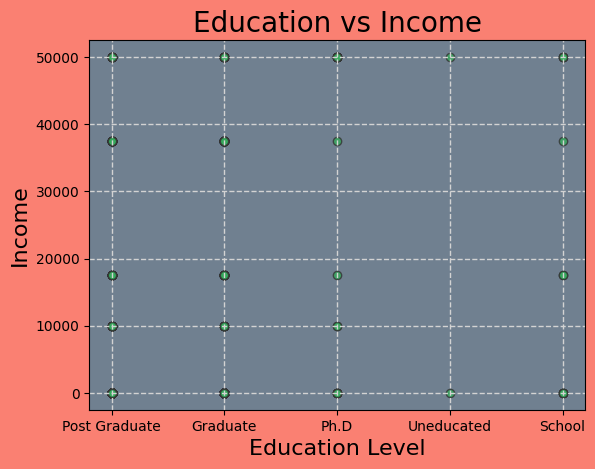

In [199]:
plt.scatter(df['Educational Qualifications'], df['Monthly Income'], c='#34A85A', edgecolor='#333333', alpha=0.8)
plt.xlabel('Education Level', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.title('Education vs Income', fontsize=20)
plt.grid(color='#d3d3d3', linestyle='--', linewidth=1)
plt.gca().set_facecolor('#708090')
plt.gcf().patch.set_facecolor('#FA8072')
plt.show()

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 750px;
  text-align: left;
">
  <h2 style="margin: 0;">Family and Location Analysis</h2>
</div>

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 750px;
  text-align: left;
">
  <h4 style="margin: 0;">What is the average family size in the dataset?</h4>
</div>

In [200]:
average_family_size = df['Family size'].mean().__round__()
print('Average family size: ',average_family_size)

Average family size:  3


<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 1000px;
  text-align: left;
">
  <h4 style="margin: 0;">What is the distribution of family sizes (small, medium, large)?</h4>
</div>

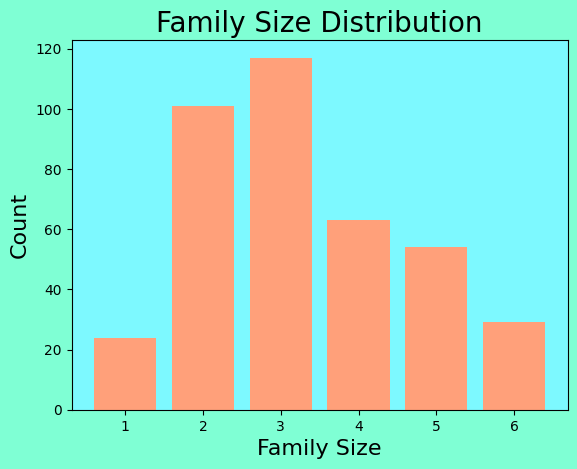

In [201]:
family_size_counts = df['Family size'].value_counts()
plt.bar(family_size_counts.index, family_size_counts.values, color='#FFA07A')
plt.title('Family Size Distribution', fontsize=20)
plt.xlabel('Family Size', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.gca().set_facecolor('#7DF9FF')
plt.gcf().patch.set_facecolor('#7FFFD4')
plt.show()

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 750px;
  text-align: left;
">
  <h2 style="margin: 0;">Output and Feedback Analysis</h2>
</div>

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 1000px;
  text-align: left;
">
  <h4 style="margin: 0;">What is the meaning of the "Output" and "Feedback" columns?</h4>
</div>

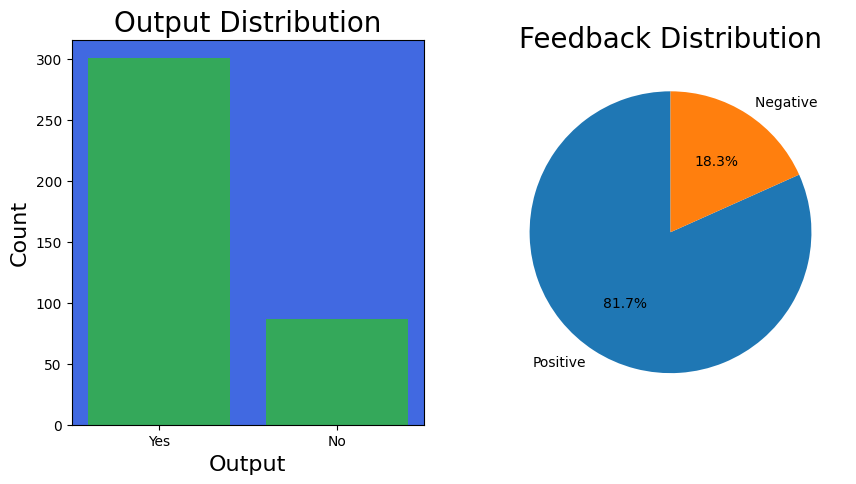

In [202]:
output_counts = df['Output'].value_counts()
feedback_counts = df['Feedback'].value_counts()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(output_counts.index, output_counts.values, color='#34A85A')
plt.title('Output Distribution', fontsize=20)
plt.xlabel('Output', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.gca().set_facecolor('#4169E1')

plt.subplot(1, 2, 2)
plt.pie(feedback_counts.values, labels=feedback_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Feedback Distribution', fontsize=20)

plt.show()

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 850px;
  text-align: left;
">
  <h4 style="margin: 0;">Are they related to a specific outcome or response?</h4>
</div>

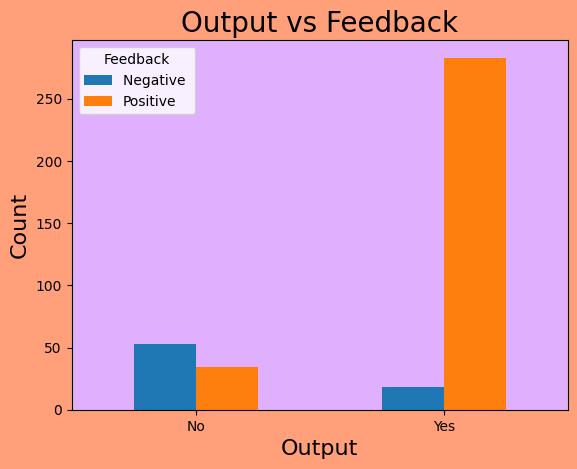

In [203]:
output_feedback_counts = df.groupby('Output')['Feedback'].value_counts().unstack()
output_feedback_counts.plot(kind='bar')
plt.title('Output vs Feedback', fontsize=20)
plt.xlabel('Output', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=0)
plt.gca().set_facecolor('#E0B0FF')
plt.gcf().set_facecolor('#FFA07A')
plt.show()

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 1000px;
  text-align: left;
">
  <h4 style="margin: 0;">Can we cluster individuals based on their characteristics to identify potential target groups for marketing or outreach efforts?</h4>
</div>

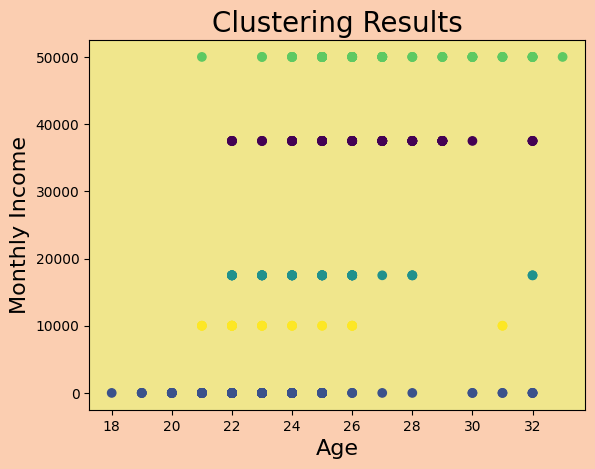

In [204]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

columns = ['Age', 'Monthly Income', 'Educational Qualifications', 'Family size']

le = LabelEncoder()
df['Educational Qualifications'] = le.fit_transform(df['Educational Qualifications'])

kmeans = KMeans(n_clusters=5, n_init=10)

kmeans.fit(df[columns])

labels = kmeans.labels_

df['Cluster'] = labels

plt.scatter(df['Age'], df['Monthly Income'], c=labels)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Monthly Income', fontsize=16)
plt.title('Clustering Results', fontsize=20)
plt.gca().patch.set_facecolor('#F0E68C')
plt.gcf().set_facecolor('#FBCEB1')
plt.show()

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 650px;
  text-align: left;
">
  <h2 style="margin: 0;">Market Segment Analysis</h2>
</div>

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 1000px;
  text-align: left;
">
  <h4 style="margin: 0;">What is the distribution of individuals across different age groups?</h4>
</div>

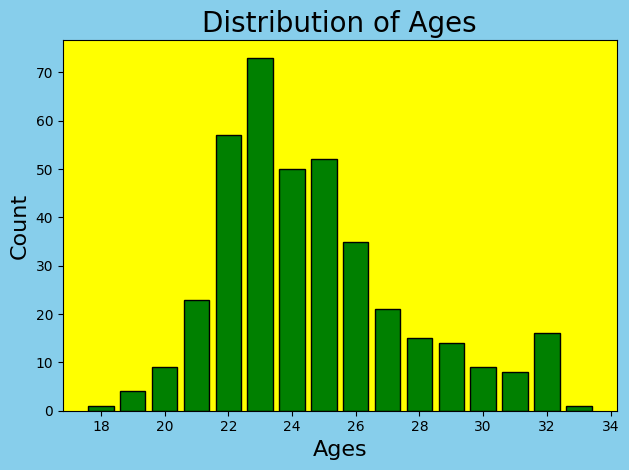

In [205]:
age_counts = df['Age'].value_counts().sort_index()

plt.bar(age_counts.index, age_counts.values, color='green', edgecolor='black')
plt.title('Distribution of Ages', fontsize=20)
plt.xlabel('Ages', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.tight_layout()
plt.gcf().patch.set_facecolor('skyblue')
plt.gca().set_facecolor('yellow')
plt.show()

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 1000px;
  text-align: left;
">
  <h4 style="margin: 0;">How does marital status correlate with educational qualifications?</h4>
</div>

In [206]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Marital Status'], df['Educational Qualifications'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 55.917538967818274
p-value: 2.927091109293357e-09
Degrees of freedom: 8
Expected frequencies table:
[[4.92680412e+01 6.40206186e+00 4.84329897e+01 3.34020619e+00
  5.56701031e-01]
 [5.47422680e+00 7.11340206e-01 5.38144330e+00 3.71134021e-01
  6.18556701e-02]
 [1.22257732e+02 1.58865979e+01 1.20185567e+02 8.28865979e+00
  1.38144330e+00]]


<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 700px;
  text-align: left;
">
  <h2 style="margin: 0;">Customer Behavior Analysis</h2>
</div>

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 800px;
  text-align: left;
">
  <h4 style="margin: 0;">How does marital status affect monthly income?</h4>
</div>

In [207]:
pd.DataFrame(df.groupby('Marital Status')['Monthly Income'].mean().sort_values(ascending=False))

,Monthly Income
Marital Status,
Married,34884.259259
Prefer not to say,30625.000000
Single,9664.179104


<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 1000px;
  text-align: left;
">
  <h4 style="margin: 0;">Do students have any significant spending patterns or preferences compared to other occupation groups?</h4>
</div>

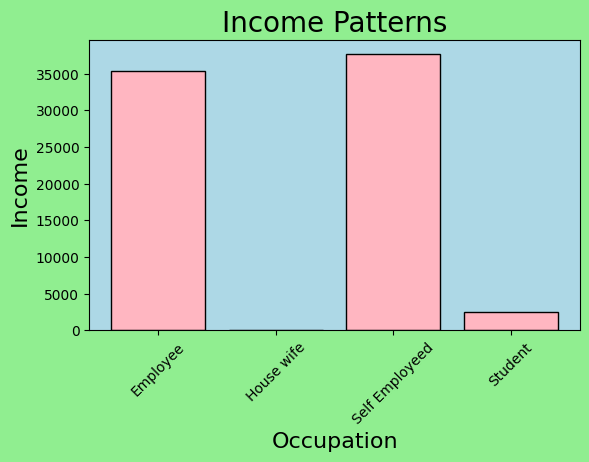

In [208]:
income_pattern = df.groupby('Occupation')['Monthly Income'].mean()

plt.figure(figsize=(6,4))
plt.bar(income_pattern.index, income_pattern.values, color='lightpink', edgecolor='black')
plt.title('Income Patterns', fontsize=20)
plt.xlabel('Occupation', fontsize=16)
plt.ylabel('Income', fontsize=16)
plt.tight_layout()
plt.xticks(rotation=45)
plt.gcf().patch.set_facecolor('lightgreen')
plt.gca().set_facecolor('lightblue')
plt.show()

<div style="
  background-color: #1A1D23;
  background-image: linear-gradient(to bottom right, #3498DB, #1A1D23);
  background-size: 100% 200px;
  background-position: 0% 100%;
  transition: background-position 0.5s ease-in-out;
  color: #FFC107;
  font-family: 'Playfair Display', serif;
  font-style: italic;
  font-weight: bold;
  font-size: 30px;
  padding: 10px 15px;
  margin: 0px 0 0 0px;
  border-radius: 10px;
  border: none;
  box-shadow: 0 0 10px rgba(0, 0, 0, 0.2);
  width: 550px;
  text-align: left;
">
  <h2 style="margin: 0;">Predictive Analysis</h2>
</div>

In [209]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Cluster
0,20,Female,Single,Student,0,2,4,12.9766,77.5993,560001,Yes,Positive,1
1,24,Female,Single,Student,10000,0,3,12.9770,77.5773,560009,Yes,Positive,4
2,22,Male,Single,Student,10000,2,3,12.9551,77.6593,560017,Yes,Negative,4
3,22,Female,Single,Student,0,0,6,12.9473,77.5616,560019,Yes,Positive,1
4,22,Male,Single,Student,10000,2,4,12.9850,77.5533,560010,Yes,Positive,4


In [210]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [211]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Monthly Income'), df['Monthly Income'], test_size=0.2, random_state=42)

In [212]:
pd.DataFrame(X_train).head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Cluster
63,23,Male,Single,Student,0,4,12.9343,77.6044,560029,Yes,Positive,1
238,27,Male,Married,Employee,0,2,12.8845,77.6036,560076,Yes,Positive,0
132,23,Male,Single,Student,2,2,13.0019,77.5713,560003,Yes,Positive,1
101,23,Male,Single,Student,2,2,12.9442,77.6076,560030,Yes,Positive,1
351,25,Male,Single,Self Employeed,0,2,12.9783,77.6408,560038,Yes,Positive,3


In [213]:
X_train.shape

(310, 12)

In [214]:
numerical_columns = [0, 5, 6, 7, 8]
cat_nominal = [1, 2, 3]
cat_ordinal = [5, 9, 10]

In [215]:
handle_numerical = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean'))
])

In [216]:
handle_nominal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first'))
])

In [217]:
handle_ordinal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])

In [218]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_columns),
    ('nominal', handle_nominal, cat_nominal),
    ('ordinal', handle_ordinal, cat_ordinal)
])

In [219]:
model = LinearRegression()

In [220]:
pipe = make_pipeline(preprocessing, model)

In [221]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  [0, 5, 6, 7, 8]),
                                                 ('nominal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [1, 2, 3]),
                                                 ('ordinal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  [5, 9, 10])])),
                ('linearregression', LinearRegression())])

In [222]:
y_pred = pipe.predict(X_test)

In [223]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 6679.056589923978
Mean Squared Error (MSE): 86780623.09970179
R-squared (R2) Score: 0.7568063975409555
